In [1]:
import numpy as np
import pandas as pd
import io
from math import radians, cos, sin
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
# Calculamos la distancia euclidiana en espacio de la ruta r por la ciudad c,
# terminando al inicio:
distancia_ruta = lambda r,c: np.sum([np.linalg.norm(c[r[p]]-c[r[p-1]]) 
                                    for p in range(len(r))])

# Invertir el orden de los elementos desde i a k en r:
inversion = lambda r,i,k: np.concatenate((r[0:i], 
                                          r[k:-len(r)+i-1:-1],r[k+1:len(r)]))

def two_opt(ciudades, umbral_mejora):
    # Array de filas con las ciudades:
    ruta = np.arange(ciudades.shape[0])
    # Inicializar el factor de mejora:
    f_mejora = 1
    # Calcular la distancia de la primera ruta:
    mejor_dist = distancia_ruta(ruta, ciudades)
    
    # Si la ruta mejora seguimos optimizando:
    while f_mejora > umbral_mejora:
        # Guardamos la mejor distancia obtenida:
        dist_a_mejorar = mejor_dist 
        
        # Para cada ciudad, excluyendo la primera y la ultima:
        for cambiar_primera in range(1,len(ruta)-2):
            # Para cada ciudad subsiguiente:
            for cambiar_ultima in range(cambiar_primera+1, len(ruta)):
                # Invertimos el orden de las ciudades:
                nueva_ruta = inversion(ruta,cambiar_primera, cambiar_ultima)
                # Comprobamos la distancia con este cambio:
                nueva_distancia = distancia_ruta(nueva_ruta, ciudades)

                # Si ha mejorado la distancia:                
                if nueva_distancia < mejor_dist: 
                    # Esta es nuestra nueva mejor ruta:
                    ruta = nueva_ruta
                    # Esta es nuestra mejor distancia:
                    mejor_dist = nueva_distancia
        # Calculamos cuanto ha mejorado la ruta:
        f_mejora = 1 - mejor_dist/dist_a_mejorar
        # Si la ruta no mejora de manera sustancial, devolvemos la ruta:
    return ruta

In [22]:
ciudades= pd.read_csv('CapitalesEspana2.csv', encoding = "ISO-8859-1")

# **Convertidor de Latitud y Longitud a Coordenadas Cartesianas**

** R de la tierra =6371 KM**
 
 
 x = R * cos( radiance(lat) ) * cos(radiance (lon))
 
 
 y = R * cos( radiance(lat) ) * sin(radiance (lon))
 
 

 
 
 


In [8]:
lat =ciudades["lat"].map(radians)
lon = ciudades["Lon"].map(radians)
x = lon.map(cos)*lat.map(cos)*6371
y = lon.map(cos)*lat.map(sin)*6371

ciudades["lat_radians"] = lat
ciudades["lon_radians"] = lon
ciudades["x"] = x
ciudades["y"] = y
ciudades.head(52)

,capital,lat,Lon,lat_radians,lon_radians,x,y
0,A Coruña,43.370126,-8.391149,0.756952,-0.146453,4581.710498,4328.185330
1,Albacete,38.995881,-1.855747,0.680607,-0.032389,4948.888248,4006.941576
2,Alicante,38.345487,-0.483183,0.669255,-0.008433,4996.496208,3952.439762
3,Almería,36.838924,-2.464132,0.642961,-0.043007,5094.150991,3816.312031
4,Ávila,40.655870,-4.697713,0.709579,-0.081991,4817.035702,4136.853521
5,Badajoz,38.878743,-6.970997,0.678562,-0.121667,4923.007724,3969.351782
6,Barcelona,41.384247,2.176349,0.722291,0.037984,4776.667853,4208.865627
7,Bilbao,43.257220,-2.923906,0.754981,-0.051032,4633.860956,4360.201837
8,Burgos,42.341130,-3.704198,0.738992,-0.064650,4699.272640,4282.179602
9,Cáceres,39.473168,-6.371211,0.688937,-0.111199,4887.543472,4025.137124


In [9]:
ciudades_d = ciudades.drop(["capital", "lat", "Lon", "lat_radians", "lon_radians"], 1)
ciudades_d.head(52)

,x,y
0,4581.710498,4328.185330
1,4948.888248,4006.941576
2,4996.496208,3952.439762
3,5094.150991,3816.312031
4,4817.035702,4136.853521
5,4923.007724,3969.351782
6,4776.667853,4208.865627
7,4633.860956,4360.201837
8,4699.272640,4282.179602
9,4887.543472,4025.137124


In [10]:
df = ciudades_d.copy()

In [11]:
scaler = MinMaxScaler(feature_range=(0, 100), copy=True)
df_escalado = scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado, columns=['x1', 'x2'])

In [12]:
df_escalado.head(52)

,x1,x2
0,0.000000,96.981450
1,43.909341,75.276260
2,49.602589,71.593785
3,61.280740,62.396164
4,28.141614,84.053904
5,40.814391,72.736464
6,23.314182,88.919482
7,6.236468,99.144680
8,14.058793,93.873022
9,36.573361,76.505663


In [13]:
ciudades_d = np.asarray(ciudades_d)

In [14]:
escalado = np.asarray(df_escalado)
escalado

array([[  0.        ,  96.9814495 ],
       [ 43.90934078,  75.27626027],
       [ 49.60258911,  71.59378493],
       [ 61.28074   ,  62.39616441],
       [ 28.14161412,  84.05390442],
       [ 40.81439081,  72.7364643 ],
       [ 23.31418212,  88.91948194],
       [  6.23646791,  99.14468022],
       [ 14.05879343,  93.87302164],
       [ 36.57336067,  76.50566257],
       [ 60.68525189,  59.18420402],
       [ 35.84340786,  81.16123826],
       [ 66.6951841 ,  55.80082239],
       [ 42.90474008,  74.7263998 ],
       [ 51.35614707,  67.92959938],
       [ 34.66927792,  81.48802257],
       [ 17.7540729 ,  92.12823959],
       [ 57.94536507,  64.14634654],
       [ 29.3893374 ,  84.44658827],
       [ 54.01457056,  63.24472767],
       [ 17.01323173,  93.35618355],
       [ 53.06293541,  67.59368958],
       [100.        ,   0.        ],
       [ 10.27365622,  94.53418599],
       [ 21.65751066,  90.4079581 ],
       [ 13.59959502,  94.90924013],
       [  4.37391929,  95.61741297],
 

# **Busqueda de rutas** #

In [15]:
#  Encontramos una buena ruta (la ruda da el orden de viaje por numero de fila)
ruta = two_opt(escalado, 0.001)
ruta

array([ 0, 26, 36, 31, 33, 48, 50, 37, 41,  4, 27,  9,  5, 13, 14, 42, 19,
       10, 39, 22, 29, 12, 28,  3, 17, 21, 30,  2,  1, 47, 34, 46, 11, 15,
       45, 18, 44,  6, 24, 51, 43, 16, 20,  8, 25, 23, 35, 49,  7, 38, 40,
       32])

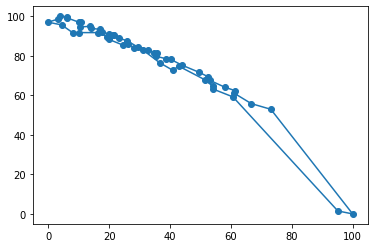

Ruta: [ 0 26 36 31 33 48 50 37 41  4 27  9  5 13 14 42 19 10 39 22 29 12 28  3
 17 21 30  2  1 47 34 46 11 15 45 18 44  6 24 51 43 16 20  8 25 23 35 49
  7 38 40 32]

Distancia Escalada: 304.70076226291434


In [16]:
# Diagrama Cartesiano
# Reordenamos la matriz por ruta:
nuevo_orden = np.concatenate((np.array([escalado[ruta[i]] 
                                        for i in range(len(ruta))]),
                              np.array([escalado[0]])))
# Mostramos las Ciudades.
plt.scatter(escalado[:,0], escalado[:,1])
# Mostramos la Ruta.
plt.plot(nuevo_orden[:,0],nuevo_orden[:,1])
plt.show()
# Imprimimos la ruta y la distancia:
print("Ruta: " + str(ruta) + "\n\nDistancia Escalada: " 
      + str(distancia_ruta(ruta, escalado)))


In [17]:
#unidades de la escala = ()Max (Lng o Lat) - Min(Lng o Lat)) /100
#unidad de escala = 53.31km
Dist_km = distancia_ruta(ruta, escalado) * 53.31
Dist_km

16243.597636235963

In [18]:
orden = pd.DataFrame(ruta, columns=["index"])
ciudades["index"] = ciudades.index
viaje = orden.merge(ciudades, on = "index")
viaje

,index,capital,lat,Lon,lat_radians,lon_radians,x,y
0,0,A Coruña,43.370126,-8.391149,0.756952,-0.146453,4581.710498,4328.185330
1,26,Lugo,43.009128,-7.558174,0.750651,-0.131915,4618.285992,4307.997152
2,36,Pontevedra,42.433814,-8.647990,0.740610,-0.150936,4648.702887,4249.882866
3,31,Ourense,42.336549,-7.863684,0.738912,-0.137247,4665.167665,4250.419033
4,33,Palencia,42.007837,-4.534601,0.733175,-0.079144,4719.174029,4250.332387
5,48,Valladolid,41.652328,-4.723349,0.726970,-0.082438,4744.189951,4219.843468
6,50,Zamora,41.499140,-5.754948,0.724297,-0.100443,4747.610467,4200.203824
7,37,Salamanca,40.967368,-5.665381,0.715015,-0.098880,4787.136429,4156.609900
8,41,Segovia,40.949870,-4.125241,0.714710,-0.071999,4799.443127,4164.725550
9,4,Ávila,40.655870,-4.697713,0.709579,-0.081991,4817.035702,4136.853521


In [19]:
inicio = viaje[0:1]
ciclo = viaje.append(inicio)
ciclo

,index,capital,lat,Lon,lat_radians,lon_radians,x,y
0,0,A Coruña,43.370126,-8.391149,0.756952,-0.146453,4581.710498,4328.185330
1,26,Lugo,43.009128,-7.558174,0.750651,-0.131915,4618.285992,4307.997152
2,36,Pontevedra,42.433814,-8.647990,0.740610,-0.150936,4648.702887,4249.882866
3,31,Ourense,42.336549,-7.863684,0.738912,-0.137247,4665.167665,4250.419033
4,33,Palencia,42.007837,-4.534601,0.733175,-0.079144,4719.174029,4250.332387
5,48,Valladolid,41.652328,-4.723349,0.726970,-0.082438,4744.189951,4219.843468
6,50,Zamora,41.499140,-5.754948,0.724297,-0.100443,4747.610467,4200.203824
7,37,Salamanca,40.967368,-5.665381,0.715015,-0.098880,4787.136429,4156.609900
8,41,Segovia,40.949870,-4.125241,0.714710,-0.071999,4799.443127,4164.725550
9,4,Ávila,40.655870,-4.697713,0.709579,-0.081991,4817.035702,4136.853521


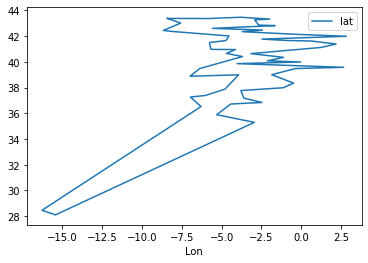

In [20]:
#Dibujar Latitud y Longitud
ciclo.plot(kind= "line", x= "Lon", y= "lat");

**Reperesentacion de rutas**

In [21]:
#Escribimos la Ruta a un CSV
viajante= ciclo[["lat", "Lon"]]
viajante.to_csv("LatyLonFin.csv", index=False)
files.download("LatyLonFin.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

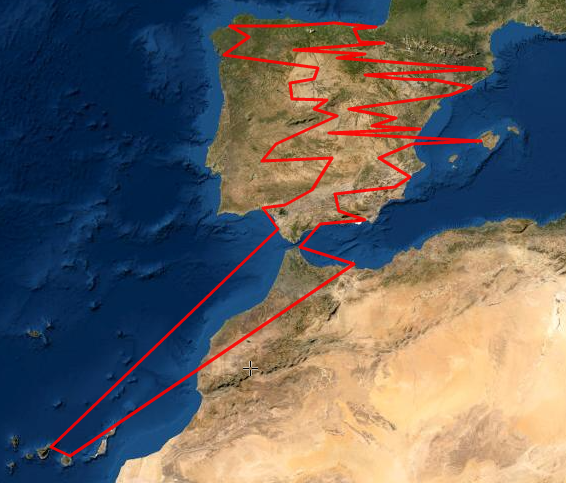